In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [20, 20]

% matplotlib inline

UsageError: Line magic function `%` not found.


In [16]:
ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/'
INPUT_FOLDER = DATA_FOLDER + f'g1-piek/scenario1/automatic_evaluations/'
OUTPUT_FOLDER = DATA_FOLDER + f'g1-piek/scenario1/plots/'

STATS_FILES = [
    'g1s1.csv',
    'g1s2.csv',
]

file = STATS_FILES[0]

### Read data

In [17]:
df = pd.read_csv(INPUT_FOLDER + file, header=0)
df = df.set_index('Turn')

In [18]:
print(f'{len(df)} turns')
df.head()

83 turns


,System llh,MLM llh,USR DLcontext,USR DLfact,Overall Human Rating,Interesting,Engaging,Specific,Relevant,Correct,...,Total axioms,Total aBox axioms,Total tBox axioms,Total world instances,Total semantic statements,Total perspectives,Total mentions,Total interactions,Total utterances,Total sources
Turn,,,,,,,,,,,,,,,,,,,,,
0.0,0.290093,0.562575,0.616137,0.801052,5.000000,5.000000,5.0,5.0,5.000000,5.000000,...,2769.0,1762.0,1007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.000000,0.100155,0.910139,0.774431,NaN,NaN,NaN,NaN,NaN,NaN,...,2769.0,1762.0,1007.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2.0,0.312401,0.694319,0.997722,0.719742,5.000000,5.000000,5.0,5.0,5.000000,5.000000,...,2769.0,1762.0,1007.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3.0,0.000000,0.082555,0.983849,0.735612,NaN,NaN,NaN,NaN,NaN,NaN,...,2840.0,1833.0,1007.0,5.0,3.0,1.0,1.0,0.0,1.0,2.0
4.0,0.547160,0.736176,0.969341,0.739177,4.666667,3.333333,4.0,4.0,4.333333,4.666667,...,2840.0,1833.0,1007.0,5.0,3.0,1.0,1.0,NaN,1.0,2.0


/Users/selbaez/anaconda3/envs/evaluating-coversations-as-ekg/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


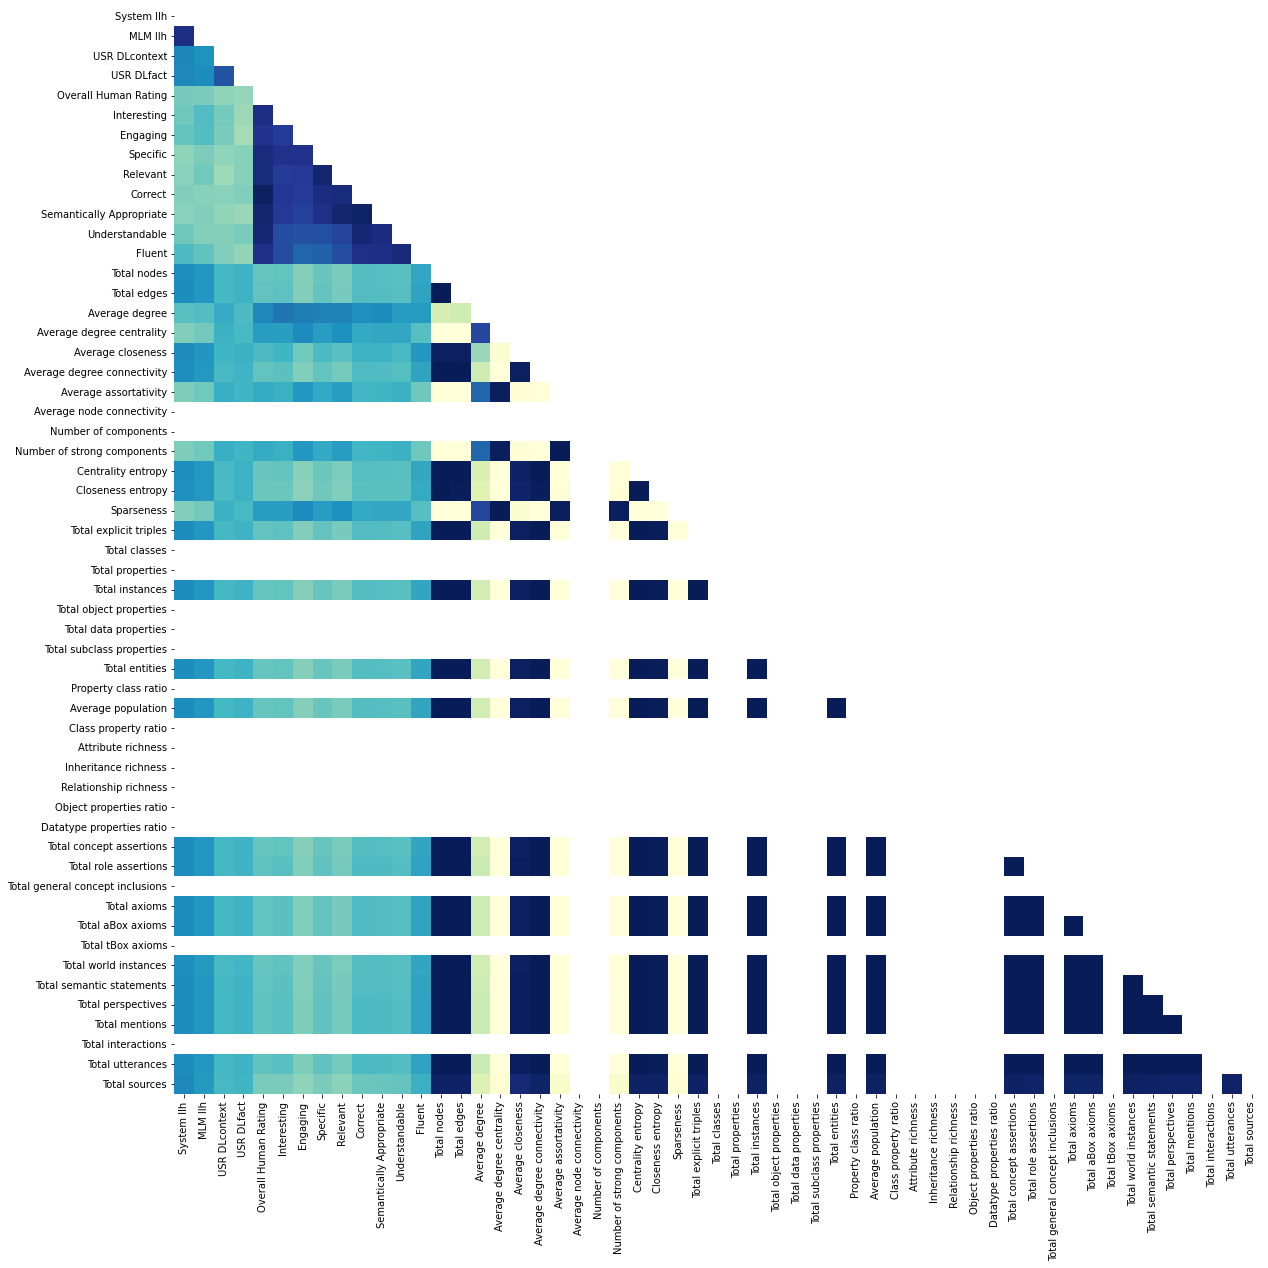

In [19]:
corr_df = df.corr(method='pearson')
# print(corr_df.head())
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))

# Plot
g = sns.heatmap(corr_df, mask=mask, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={"shrink": .7}, cbar=False, square=True)
g.figure.savefig(OUTPUT_FOLDER + f"Correlation heatmap.png", dpi=300)

In [20]:
df.columns

Index(['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',
       'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
       'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable',
       'Fluent', 'Total nodes', 'Total edges', 'Average degree',
       'Average degree centrality', 'Average closeness',
       'Average degree connectivity', 'Average assortativity',
       'Average node connectivity', 'Number of components',
       'Number of strong components', 'Centrality entropy',
       'Closeness entropy', 'Sparseness', 'Total explicit triples',
       'Total classes', 'Total properties', 'Total instances',
       'Total object properties', 'Total data properties',
       'Total subclass properties', 'Total entities', 'Property class ratio',
       'Average population', 'Class property ratio', 'Attribute richness',
       'Inheritance richness', 'Relationship richness',
       'Object properties ratio', 'Datatype properties ratio',
       'Total concept as

## Plots

In [11]:
# # Separate information so it can be comparable
# df_conflicts = df[['cardinality conflicts', 'negation conflicts']]
# df_gaps = df[['subject gaps', 'object gaps']]
# df_novelty = df[['statement novelty']]
# df_novelties = df[['subject novelty', 'object novelty']]
# df_overlaps = df[['overlaps subject-predicate', 'overlaps on predicate-object']]
# df_trust = df['trust']

df_automatic = ('Automatic metrics',
                df[['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact']])
df_human = ('Human metrics',
            df[['Overall Human Rating', 
                'Interesting', 'Engaging', 'Specific', 'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent']])

df_graph = ('Graph metrics',
            df[['Average degree centrality', 'Average closeness',
                'Average degree connectivity', 'Average assortativity',
                'Average node connectivity', 'Number of components',
                'Number of strong components', 'Centrality entropy',
                'Closeness entropy', 'Sparseness', ]])
df_graph_size = ('Graph size', 
                 df[['Total nodes', 'Total edges']])
df_degree = ('Graph degree', 
             df[['Average degree']])
df_degree_centr = ('Graph degree', 
             df[['Average degree centrality']])

df_onto_size = ('RDF graph size', df['Total explicit triples'])
df_ontology = ('Ontology size', df[['Total classes', 'Total properties']])

df_brain = ('Brain', df[['Total semantic statements', 'Total sources']])



In [12]:

dfs = [
    # df_automatic,
    df_human,
    df_graph,
    df_graph_size,
    df_degree,
    df_degree_centr
    df_onto_size,
    df_ontology,
    df_brain,
]

In [13]:
def plot_progression(df_to_plot, name):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name='vals')
    g = sns.catplot(x="Turn", y="vals", hue='cols', data=df_to_plot, kind='point')

    ax = plt.gca()
    plt.xticks(ax.get_xticks()[::5], rotation="045")

    g.figure.savefig(OUTPUT_FOLDER + f"{name}.png", dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: './../../data/plots/Human metrics.png'

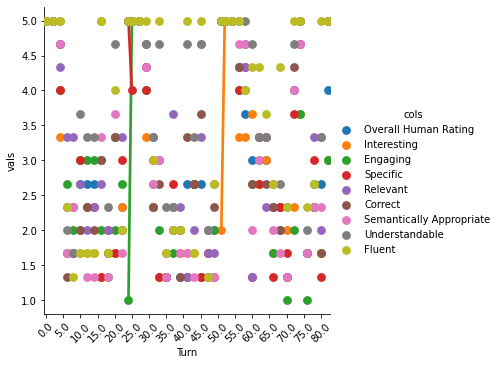

In [14]:
for (name, el) in dfs:
    plot_progression(el, name)